In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from copy import deepcopy
import time

%matplotlib inline

In [35]:
sns.set_theme()

In [2]:
!rm -rf ActuarialThesis
!git clone https://github.com/aderdouri/ActuarialThesis.git

Cloning into 'ActuarialThesis'...
remote: Enumerating objects: 727, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 727 (delta 1), reused 9 (delta 1), pack-reused 717
Receiving objects: 100% (727/727), 120.84 MiB | 15.04 MiB/s, done.
Resolving deltas: 100% (291/291), done.


In [3]:
!ls -ltr ActuarialThesis/FrenchMotorThirdPartyLiabilityClaims

total 31188
-rw-r--r-- 1 root root 31528920 May 29 05:41 freMTPL2freq.csv
-rw-r--r-- 1 root root   403127 May 29 05:41 freMTPL2sev.csv


In [21]:
freMTPL2freq = pd.read_csv('ActuarialThesis/FrenchMotorThirdPartyLiabilityClaims/freMTPL2freq.csv')
freMTPL2freq.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,1.0,1,0.10,D,5,0,55,50,B12,Regular,1217,R82
1,3.0,1,0.77,D,5,0,55,50,B12,Regular,1217,R82
2,5.0,1,0.75,B,6,2,52,50,B12,Diesel,54,R22
3,10.0,1,0.09,B,7,0,46,50,B12,Diesel,76,R72
4,11.0,1,0.84,B,7,0,46,50,B12,Diesel,76,R72


In [23]:
freMTPL2sev = pd.read_csv('ActuarialThesis/FrenchMotorThirdPartyLiabilityClaims/freMTPL2sev.csv')
freMTPL2sev.head()

,IDpol,ClaimAmount
0,1552,995.20
1,1010996,1128.12
2,4024277,1851.11
3,4007252,1204.00
4,4046424,1204.00


In [24]:
freMTPL2freq[freMTPL2freq['IDpol']==24952]

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
9387,24952.0,0,0.005464,A,6,15,50,50,B2,Diesel,29,R24


In [25]:
freMTPL2freq[freMTPL2freq['IDpol']==4046424]

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
508571,4046424.0,1,0.86,F,12,0,37,50,B12,Diesel,27000,R11


In [28]:
freMTPL2freqsev = pd.merge(freMTPL2freq, freMTPL2sev, on='IDpol', how='outer')
freMTPL2freqsev['ClaimAmount'] = freMTPL2freqsev['ClaimAmount'].fillna(0)

In [29]:
freMTPL2freqsev.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount
0,1.0,1.0,0.10,D,5.0,0.0,55.0,50.0,B12,Regular,1217.0,R82,0.0
1,3.0,1.0,0.77,D,5.0,0.0,55.0,50.0,B12,Regular,1217.0,R82,0.0
2,5.0,1.0,0.75,B,6.0,2.0,52.0,50.0,B12,Diesel,54.0,R22,0.0
3,10.0,1.0,0.09,B,7.0,0.0,46.0,50.0,B12,Diesel,76.0,R72,0.0
4,11.0,1.0,0.84,B,7.0,0.0,46.0,50.0,B12,Diesel,76.0,R72,0.0


## Remarque:
Suite au merge des deux datasets, vérifions que toutes les observations ayant un nombre de sinistres égale à zéro ont bien un montant de sinistres égale aussi à zéro.

In [30]:
len(freMTPL2freqsev[(freMTPL2freqsev['ClaimAmount']==0) & (freMTPL2freqsev['ClaimNb']>0)])

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount
0,1.0,1.0,0.10,D,5.0,0.0,55.0,50.0,B12,Regular,1217.0,R82,0.0
1,3.0,1.0,0.77,D,5.0,0.0,55.0,50.0,B12,Regular,1217.0,R82,0.0
2,5.0,1.0,0.75,B,6.0,2.0,52.0,50.0,B12,Diesel,54.0,R22,0.0
3,10.0,1.0,0.09,B,7.0,0.0,46.0,50.0,B12,Diesel,76.0,R72,0.0
4,11.0,1.0,0.84,B,7.0,0.0,46.0,50.0,B12,Diesel,76.0,R72,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
534825,4124801.0,1.0,1.00,C,5.0,5.0,45.0,50.0,B5,Regular,242.0,R82,0.0
536553,4126524.0,1.0,1.00,D,5.0,6.0,43.0,54.0,B2,Regular,1282.0,R31,0.0
546624,4136585.0,1.0,1.00,C,6.0,12.0,44.0,50.0,B1,Diesel,304.0,R11,0.0
596598,4186466.0,1.0,0.59,D,10.0,10.0,63.0,50.0,B13,Regular,1313.0,R24,0.0


## Analyse de la variable cible (Target variable)

In [46]:
100*len(freMTPL2freq[freMTPL2freq['ClaimNb']==0]) / len(freMTPL2freq)

94.97649750078538

## Remarque:
Uniquement `3.9%` des montants de sinistres sont strictement supérieurs à zéros.

In [47]:
a = freMTPL2freq['ClaimNb'].skew()
print('Skewness of loss feature is :', a)

Skewness of loss feature is : 5.599613311529552


In [ ]:
sns.set_theme()

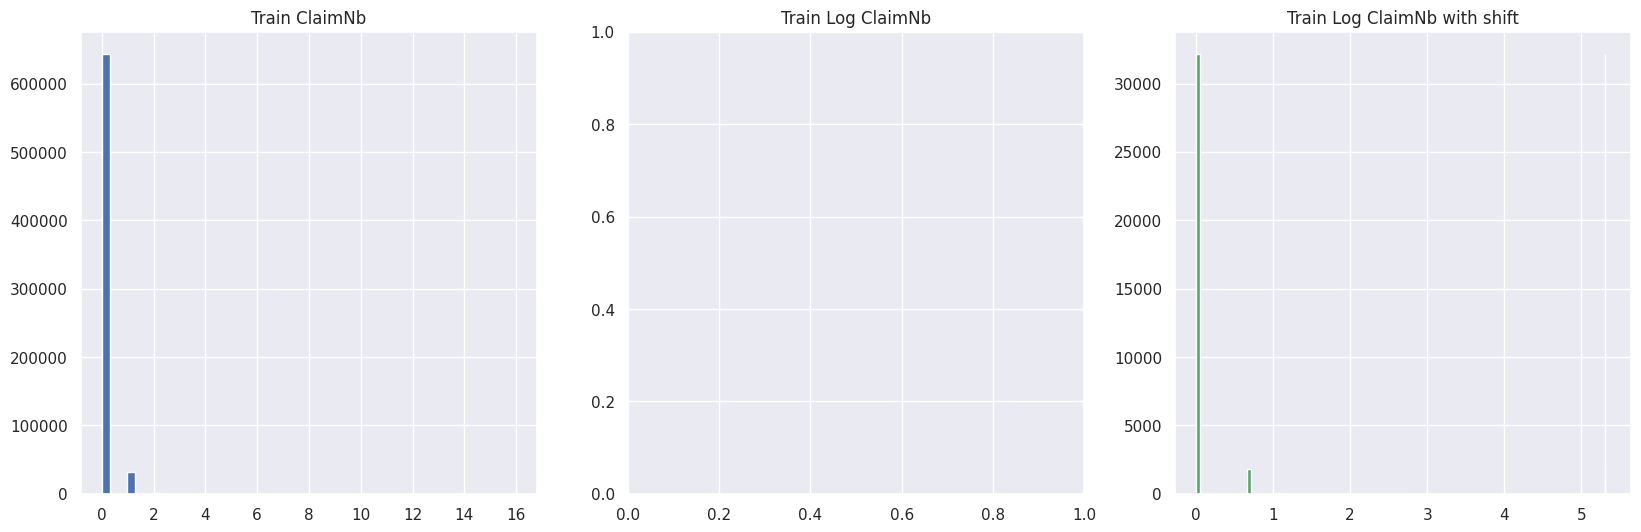

In [51]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_size_inches(20, 6)

ax1.hist(freMTPL2freq['ClaimNb'], bins=50)
ax1.set_title('Train ClaimNb')

ax3.hist(np.log(freMTPL2freq[freMTPL2freq['ClaimNb']>0]['ClaimNb']), bins=50, color='g')
ax2.set_title('Train Log ClaimNb')

ax3.hist(np.log(freMTPL2freq[freMTPL2freq['ClaimNb']>0]['ClaimNb']+200), bins=50, color='g')
ax3.set_title('Train Log ClaimNb with shift')
plt.savefig('ActuarialThesis/Plots/myHistogramFrenchMotorClaimNB.pdf');
plt.show()

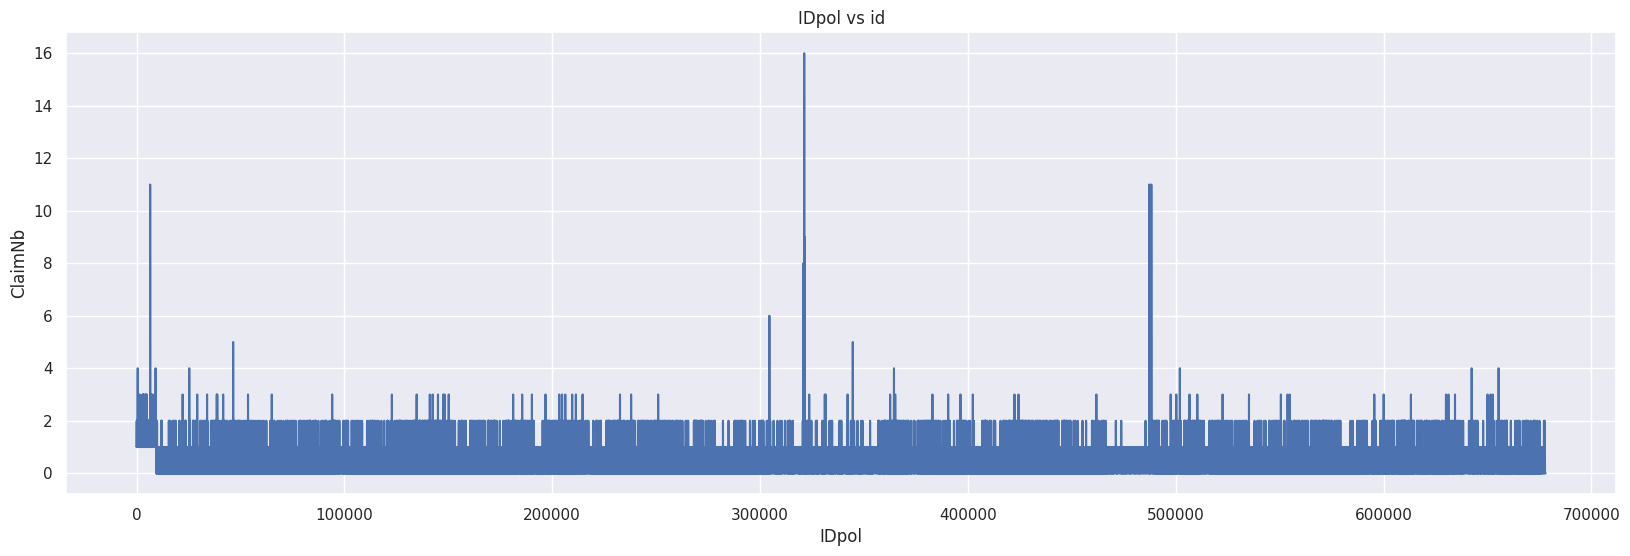

In [41]:
plt.figure(figsize=(20, 6))
plt.plot(freMTPL2freq.index, freMTPL2freq['ClaimNb'])
plt.xlabel('IDpol')
plt.ylabel('ClaimNb')
plt.title('IDpol vs id')
plt.savefig('ActuarialThesis/Plots/myFrenchMotorClaimNb.pdf');
plt.show()

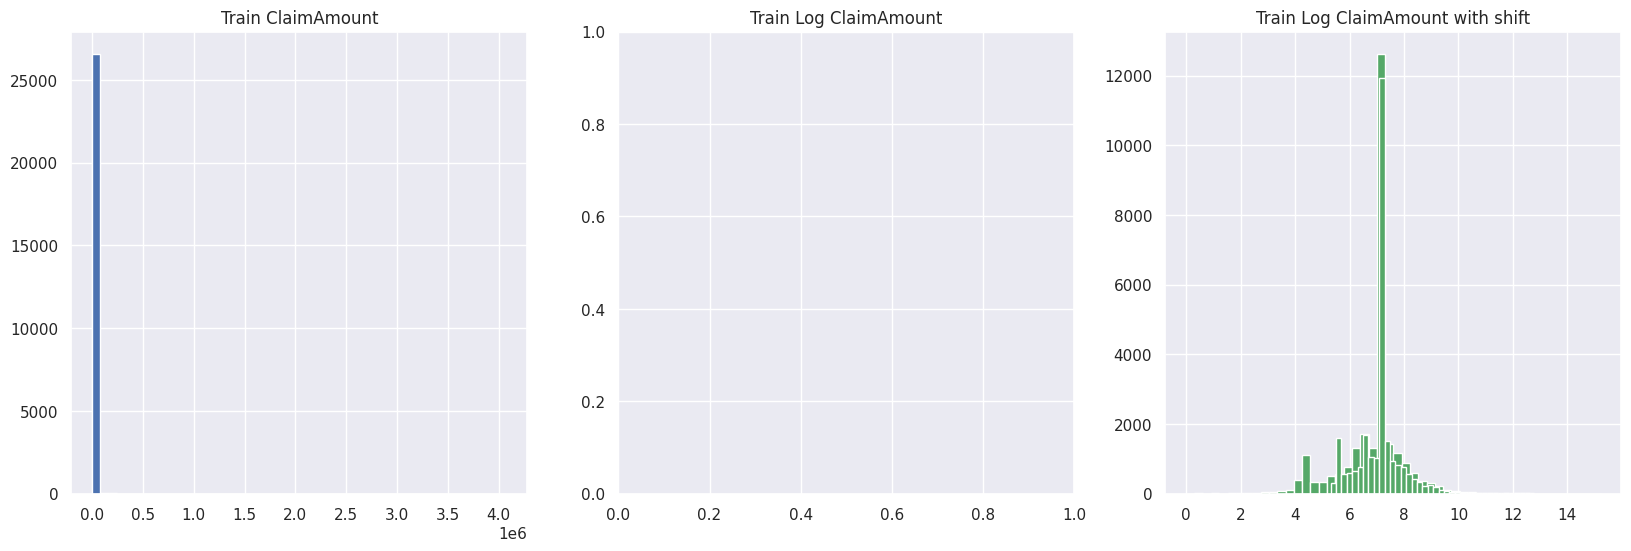

In [52]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_size_inches(20, 6)

ax1.hist(freMTPL2sev['ClaimAmount'], bins=50)
ax1.set_title('Train ClaimAmount')

ax3.hist(np.log(freMTPL2sev[freMTPL2sev['ClaimAmount']>0]['ClaimAmount']), bins=50, color='g')
ax2.set_title('Train Log ClaimAmount')

ax3.hist(np.log(freMTPL2sev[freMTPL2sev['ClaimAmount']>0]['ClaimAmount']+200), bins=50, color='g')
ax3.set_title('Train Log ClaimAmount with shift')
plt.savefig('ActuarialThesis/Plots/myHistogramFrenchMotorClaimAmount.pdf');
plt.show()

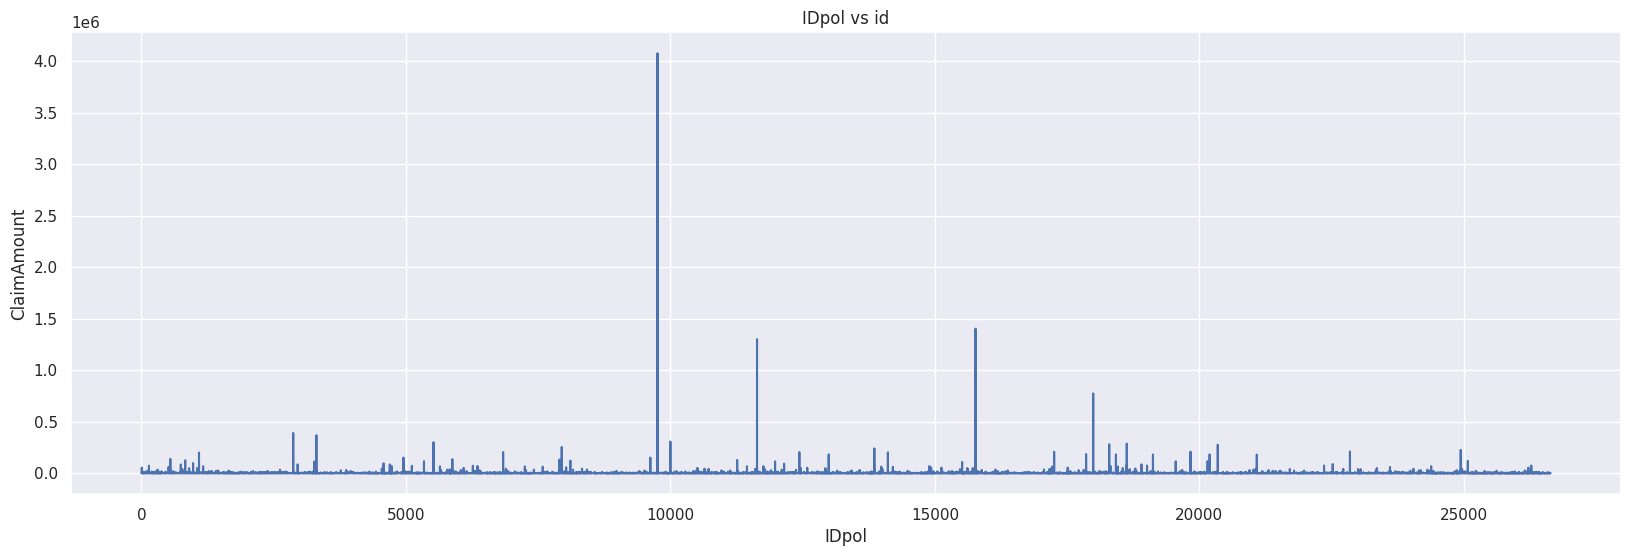

In [48]:
plt.figure(figsize=(20, 6))
plt.plot(freMTPL2sev.index, freMTPL2sev['ClaimAmount'])
plt.xlabel('IDpol')
plt.ylabel('ClaimAmount')
plt.title('IDpol vs id')
plt.savefig('ActuarialThesis/Plots/myFrenchMotorClaimAmount.pdf');
plt.show()

## Remarque:
* Nous pouvons remarquer qu'il y a plusieurs pics dans le graphe de la caractéristique de perte, ce qui représente une perte énorme à un moment donné.
* Comme nous remarquons de nombreux pics, nous pouvons dire que les données réelles de cette caractéristique sont biaisées (skewed), ce qui peut entraîner une performance sous-optimale des modèles de régression que nous construisons.
* Les données asymétriques (désiquilibrés) ont une incidence considérable sur vos performances.

## Calculate skewness and see how we can reduce skewness.

In [50]:
a = freMTPL2sev['ClaimAmount'].skew()
print('Skewness of ClaimAmount feature is :',a)

Skewness of ClaimAmount feature is : 109.56449249616011


In [ ]:
freMTPL2freqsev['logloss'] = np.log(freMTPL2freqsev[freMTPL2freqsev['ClaimAmount']>0]['ClaimAmount'])
print('Skewness of ClaimAmount feature after applying log function :', freMTPL2freqsev['logloss'].skew())
train_data = freMTPL2freqsev.drop(['logloss'],axis = 1)

Skewness of ClaimAmount feature after applying log function : -2.6694327250597327


## Observation:
* we can see that there is a lot of skewness in the target variable and this will result in wrong predictions.
* we applied log transformation over that target variable and noticed that skewness has decreased a lot.

## Plots for target variable before and after log transformation

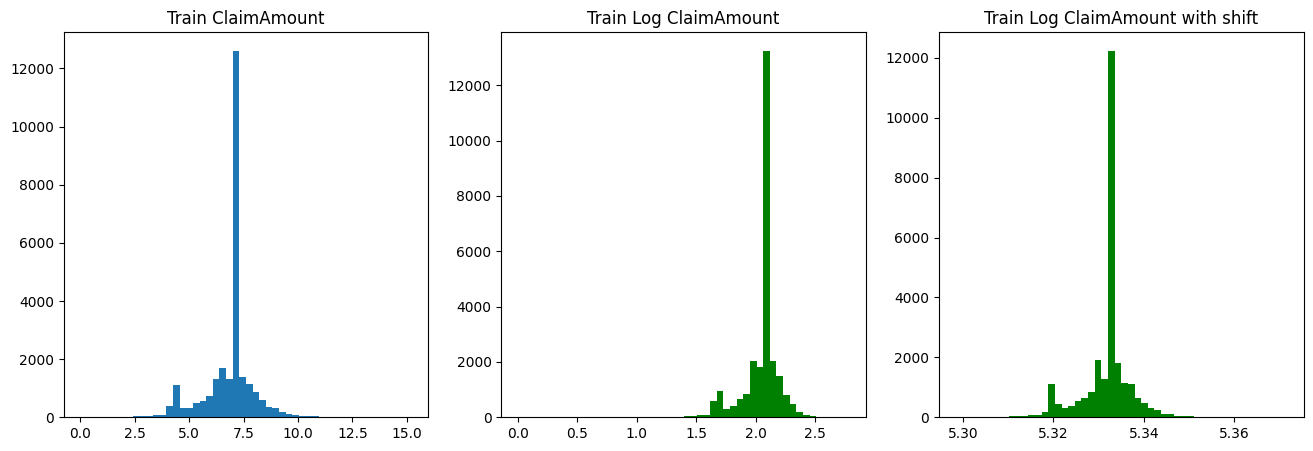

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_size_inches(16,5)

ax1.hist(freMTPL2freqsev['ClaimAmount'], bins=50)
ax1.set_title('Train ClaimAmount')

ax2.hist(np.log(freMTPL2freqsev['ClaimAmount']+1), bins=50, color='g')
ax2.set_title('Train Log ClaimAmount')

ax3.hist(np.log(freMTPL2freqsev['ClaimAmount']+200), bins=50, color='g')
ax3.set_title('Train Log ClaimAmount with shift')
plt.show()

## Box plot of target variable

## Remarque:
* Nous pouvons immédiatement remarquer que la plupart des valeurs des 25, 50 et 75e percentiles sont très faibles. Il y a quelques points où la perte est très élevée, habituellement nous les traitons comme des valeurs aberrantes, mais dans ce cas nous devons les traiter car l'entreprise a subi une perte énorme à ce moment-là.